# Data Analysis on Lynchings From 1882-1968

In [90]:
# source of data: http://archive.tuskegee.edu/repository/wp-content/uploads/2020/11/Lynchings-Stats-Year-Dates-Causes.pdf

# This dataset comes from Tuskegee University

In [91]:
# Import libraries

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import folium

In [92]:
# Import datasets

# Lynching broken down by Crime
lynch_cause_df = pd.read_excel ('Causes Of Lynchings.xlsx')

# Lynching broken down by state and race
lynch_state_race_df = pd.read_excel ('Lynchings By State and Race 1882-1968.xlsx')

# Lynching broken down by year and race
lynch_year_race_df = pd.read_excel ('Lynchings By Year and Race.xlsx')

In [93]:
# How many years was the data collected?

years_data_collection = 1968-1882

In [94]:
# Observe the sum

print('Lynching data spans', years_data_collection,'years.')

Lynching data spans 86 years.


# Analysis on Causes of Lynchings

In [95]:
# Look at dataframe and sort for matplotlib bar chart

lynch_cause_df = lynch_cause_df.sort_values('Count', ascending=False)

# Look at head

lynch_cause_df.head()

,Crimes,Count,Proportion
0,Homicides,1937,40.84
6,All Other Causes,1084,22.85
2,Rape,912,19.22
3,Attempted Rape,288,6.07
4,Robbery and Theft,232,4.89


In [96]:
# Total amount of lynching within dataset

lynch_cause_df['Count'].sum()

4743

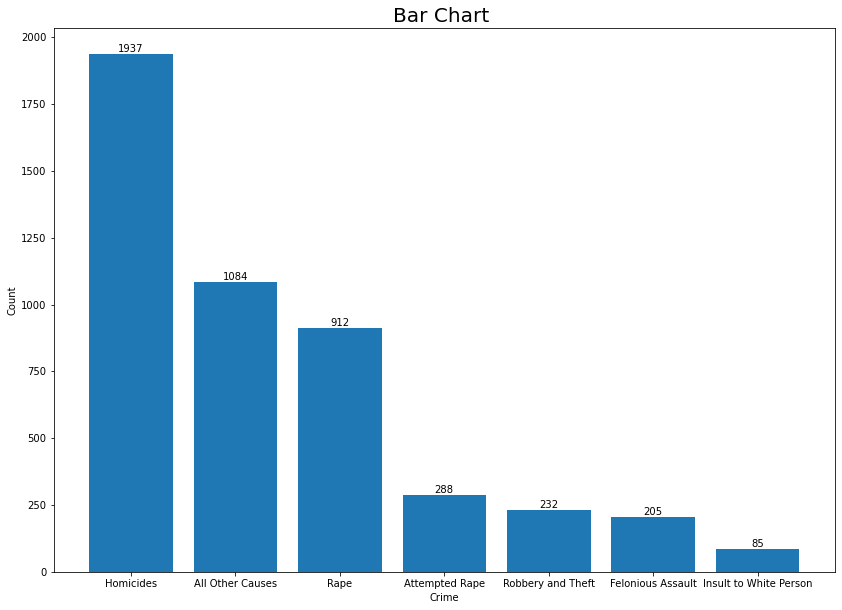

In [97]:
#  Bar chart of Lynching by Crime

# Parameters of figure size
plt.rcParams["figure.figsize"] = (14,10)


# Add figure
fig, ax = plt.subplots()

# Add title
fontsize = 20
ax.set_title('Bar Chart ', fontsize=fontsize)

# Add labels
ax.set_xlabel('Crime')
ax.set_ylabel('Count')

# Add variables to visualize
g = ax.bar(lynch_cause_df['Crimes'],lynch_cause_df['Count'])
ax.bar_label(g)

# Display plot
plt.show()

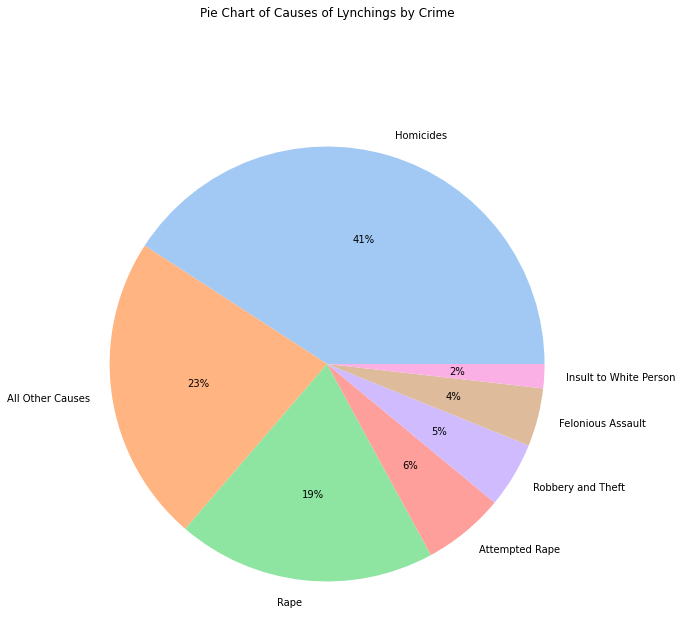

In [98]:
# Define seaborn colors palette to use
colors = sns.color_palette('pastel')

# Add title
plt.title('Pie Chart of Causes of Lynchings by Crime', pad=76)

# Create Pie Chart
plt.pie(lynch_cause_df['Count'], labels = lynch_cause_df['Crimes'], colors = colors, autopct='%.0f%%')
plt.show()

# Analysis on Causes of Lynchings By State and Race 

In [99]:
# Look at dataframe

lynch_state_race_df.head()

,State_Name,State,White,Black,Total
0,Alabama,AL,48,299,347
1,Arizona,AZ,31,0,31
2,Arkansas,AR,58,226,284
3,California,CA,41,2,43
4,Colorado,CO,65,3,68


In [100]:
# Change variable name from Total to Lynch Total

lynch_state_race_df.rename(columns = {'Total':'Lynching Total'}, inplace = True)

In [101]:
# Look at how many states had lynching

lynch_state_race_df_state_count = lynch_state_race_df.State.count()

print('Lynching occurred in', lynch_state_race_df_state_count,'states.')

Lynching occurred in 44 states.


In [102]:
# Create a map for Lynch Total


fig = px.choropleth(lynch_state_race_df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Lynching Total',
                    color_continuous_scale="Viridis_r",
                    )
fig.update_layout(
    title_text = 'Lynching Count by State Total', title_x=0.5,
    geo_scope='usa',
    legend_title="Legend Title"

)

fig.show()

In [103]:
# Create a map for Whites 

fig_white = px.choropleth(lynch_state_race_df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='White',
                    color_continuous_scale="Viridis_r",
                    )
fig_white.update_layout(
    title_text = 'Lynching Count of Whites Per State', title_x=0.5,
    geo_scope='usa',
    legend_title="Legend Title"

)


fig_black = px.choropleth(lynch_state_race_df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Black',
                    color_continuous_scale="Viridis_r",
                    )
fig_black.update_layout(
    title_text = 'Lynching Count by Blacks Total', title_x=0.5,
    geo_scope='usa',
    legend_title="Legend Title"

)

fig_white.show()
fig_black.show()

# Analysis on Lynchings by Year and Race

In [104]:
# Look at dataframe

lynch_year_race_df.head()

,Year,Whites,Blacks,Total
0,1882,64,49,113
1,1883,77,53,130
2,1884,160,51,211
3,1885,110,74,184
4,1886,64,74,138


In [105]:
# Look at the data types

lynch_year_race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    44 non-null     int64
 1   Whites  44 non-null     int64
 2   Blacks  44 non-null     int64
 3   Total   44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [106]:
# Look at the column names

print(lynch_year_race_df.columns.tolist())

['Year', 'Whites', 'Blacks', 'Total']


In [115]:
#  Create time series graph of lynching from 1882-1968

fig = px.line(lynch_year_race_df, x='Year', y=['Whites', 'Blacks'])
  

fig.update_layout(plot_bgcolor = "white", 
                  title_text='Lynchings From 1882-1968 by Race', title_x=0.5,
                  legend_title="Race of Victims",
                  yaxis_title="Count of Lynchings")
fig.show()